<a href="https://colab.research.google.com/github/GiacomoMM/blood-cell-classification-detection/blob/main/Progetto_LabIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn as sk
import torch
import torchvision

#Data download

In [2]:
import requests
import zipfile
from pathlib import Path

data_path=Path("data/")
#se ci sono gia i dati
if data_path.is_dir():
  print("directory esiste già")
else:
  data_path.mkdir(parents=True,exist_ok=True)
  print("directory data creata")

with open(data_path / "PBC_dataset_normal_DIB_224.zip","wb") as f:
  request=requests.get("https://github.com/GiacomoMM/blood-cell-classification-detection/raw/main/PBC_dataset_normal_DIB_224.zip?download=")
  print("downloading dataset")
  f.write(request.content)

with zipfile.ZipFile(data_path / "PBC_dataset_normal_DIB_224.zip","r") as zip_f:
  print("unzipping dataset")
  zip_f.extractall(data_path)


directory esiste già
downloading dataset
unzipping dataset


In [3]:
import os
def directory(dir_path):
  for dirpath,dirname,filename in os.walk(dir_path):
    print(f"Ci sono {len(dirname)} directory e {len(filename)} immagini in {dirpath}")

In [4]:
directory(data_path)

Ci sono 1 directory e 1 immagini in data
Ci sono 8 directory e 0 immagini in data/PBC_dataset_normal_DIB_224
Ci sono 0 directory e 1218 immagini in data/PBC_dataset_normal_DIB_224/basophil
Ci sono 0 directory e 2348 immagini in data/PBC_dataset_normal_DIB_224/platelet
Ci sono 0 directory e 1420 immagini in data/PBC_dataset_normal_DIB_224/monocyte
Ci sono 0 directory e 1214 immagini in data/PBC_dataset_normal_DIB_224/lymphocyte
Ci sono 0 directory e 1551 immagini in data/PBC_dataset_normal_DIB_224/erythroblast
Ci sono 0 directory e 2895 immagini in data/PBC_dataset_normal_DIB_224/ig
Ci sono 0 directory e 3117 immagini in data/PBC_dataset_normal_DIB_224/eosinophil
Ci sono 0 directory e 3329 immagini in data/PBC_dataset_normal_DIB_224/neutrophil


#Analisi Dati

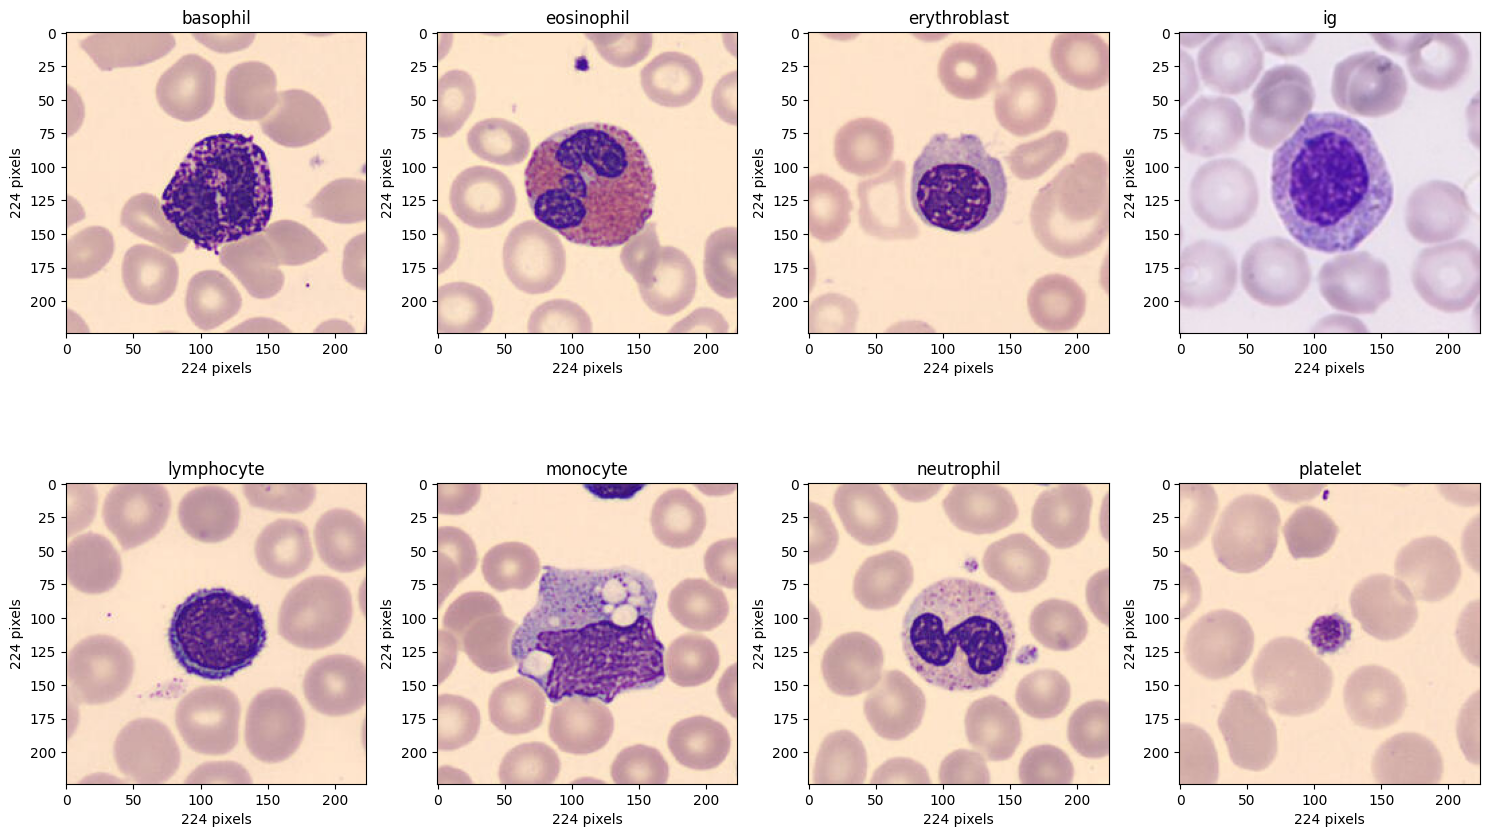

In [5]:
import random
from PIL import Image
import matplotlib.pyplot as plt

lista_path=list()
lista_classi=list()

image_basophil_path=Path("/content/data/PBC_dataset_normal_DIB_224/basophil/")
image_basophil_path_list= list(image_basophil_path.glob("*.jpg"))
random_image_basophil_path=random.choice(image_basophil_path_list)
#image_basophil=Image.open(random_image_basophil_path)
lista_classi.append(random_image_basophil_path.parent.stem)
lista_path.append(random_image_basophil_path)

image_eosinophil_path=Path("/content/data/PBC_dataset_normal_DIB_224/eosinophil/")
image_eosinophil_path_list= list(image_eosinophil_path.glob("*.jpg"))
random_image_eosinophil_path=random.choice(image_eosinophil_path_list)
#image_eosinophil=Image.open(random_image_eosinophil_path)
lista_classi.append(random_image_eosinophil_path.parent.stem)
lista_path.append(random_image_eosinophil_path)

image_erythroblast_path=Path("/content/data/PBC_dataset_normal_DIB_224/erythroblast/")
image_erythroblast_path_list= list(image_erythroblast_path.glob("*.jpg"))
random_image_erythroblast_path=random.choice(image_erythroblast_path_list)
#image_erythroblast=Image.open(random_image_erythroblast_path)
lista_classi.append(random_image_erythroblast_path.parent.stem)
lista_path.append(random_image_erythroblast_path)

image_ig_path=Path("/content/data/PBC_dataset_normal_DIB_224/ig/")
image_ig_path_list= list(image_ig_path.glob("*.jpg"))
random_image_ig_path=random.choice(image_ig_path_list)
#image_ig=Image.open(random_image_ig_path)
lista_classi.append(random_image_ig_path.parent.stem)
lista_path.append(random_image_ig_path)

image_lymphocyte_path=Path("/content/data/PBC_dataset_normal_DIB_224/lymphocyte/")
image_lymphocyte_path_list= list(image_lymphocyte_path.glob("*.jpg"))
random_image_lymphocyte_path=random.choice(image_lymphocyte_path_list)
#image_lymphocyte=Image.open(random_image_lymphocyte_path)
lista_classi.append(random_image_lymphocyte_path.parent.stem)
lista_path.append(random_image_lymphocyte_path)

image_monocyte_path=Path("/content/data/PBC_dataset_normal_DIB_224/monocyte/")
image_monocyte_path_list= list(image_monocyte_path.glob("*.jpg"))
random_image_monocyte_path=random.choice(image_monocyte_path_list)
#image_monocyte=Image.open(random_image_monocyte_path)
lista_classi.append(random_image_monocyte_path.parent.stem)
lista_path.append(random_image_monocyte_path)

image_neutrophil_path=Path("/content/data/PBC_dataset_normal_DIB_224/neutrophil/")
image_neutrophil_path_list= list(image_neutrophil_path.glob("*.jpg"))
random_image_neutrophil_path=random.choice(image_neutrophil_path_list)
#image_neutrophil=Image.open(random_image_neutrophil_path)
lista_classi.append(random_image_neutrophil_path.parent.stem)
lista_path.append(random_image_neutrophil_path)

image_platelet_path=Path("/content/data/PBC_dataset_normal_DIB_224/platelet/")
image_platelet_path_list= list(image_platelet_path.glob("*.jpg"))
random_image_platelet_path=random.choice(image_platelet_path_list)
#image_platelet=Image.open(random_image_platelet_path)
lista_classi.append(random_image_platelet_path.parent.stem)
lista_path.append(random_image_platelet_path)


plot,axs=plt.subplots(nrows=2,ncols=4,figsize=(15,15))

for i in range(8):
  image =Image.open(lista_path[i])
  ax = axs[i // 4, i % 4]
  ax.imshow(image)
  ax.set_title(f"{lista_classi[i]}")
  width, height = image.size
  ax.set_xlabel(f"{width} pixels")
  ax.set_ylabel(f"{height} pixels")

plt.tight_layout(h_pad=-26.0)
plt.show()


In [6]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

dataset = ImageFolder(root="/content/data/PBC_dataset_normal_DIB_224", transform=transform, allow_empty=False)
print(dataset.classes)
print(dataset.class_to_idx)
print(f"Numero totale di immagini: {len(dataset)}")


['basophil', 'eosinophil', 'erythroblast', 'ig', 'lymphocyte', 'monocyte', 'neutrophil', 'platelet']
{'basophil': 0, 'eosinophil': 1, 'erythroblast': 2, 'ig': 3, 'lymphocyte': 4, 'monocyte': 5, 'neutrophil': 6, 'platelet': 7}
Numero totale di immagini: 17092


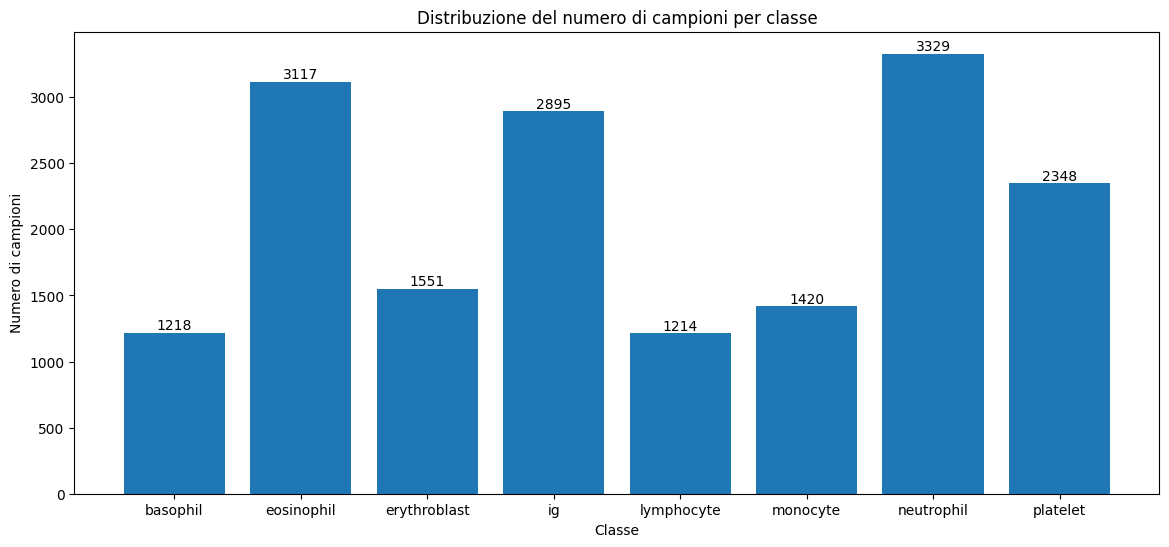

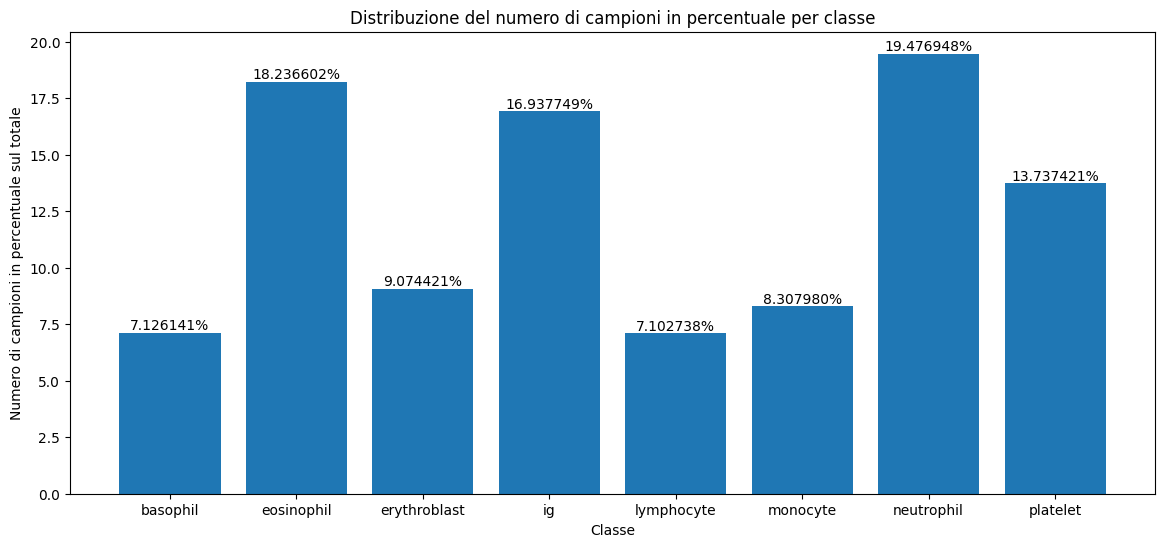

In [7]:
classes = dataset.classes
class_counts = [0]*8

for _, indx in dataset:
    class_counts[indx] += 1

plt.figure(figsize=(14, 6))
bar=plt.bar(classes, class_counts)
plt.bar_label(bar)
plt.xlabel("Classe")
plt.ylabel("Numero di campioni")
plt.title("Distribuzione del numero di campioni per classe")
plt.show()

#percentuale sul totale
for i in range(len(class_counts)):
  class_counts[i]=class_counts[i]/len(dataset)*100


plt.figure(figsize=(14, 6))
bar=plt.bar(classes, class_counts)
plt.bar_label(bar,fmt="%f%%")
plt.xlabel("Classe")
plt.ylabel("Numero di campioni in percentuale sul totale")
plt.title("Distribuzione del numero di campioni in percentuale per classe")
plt.show()



#Manipolazione Dati

In [8]:
data = []
for idx, (image, label) in enumerate(dataset):
    image_np = np.asarray(image)
    data.append({
        "image": image_np.flatten(),
        "label": dataset.classes[label],
    })
df = pd.DataFrame(data)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,image,label
0,"[0.99607843, 0.99607843, 0.99607843, 0.9960784...",neutrophil
1,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",monocyte
2,"[0.81960785, 0.8392157, 0.84705883, 0.84313726...",platelet
3,"[0.77254903, 0.85882354, 0.9843137, 1.0, 0.996...",erythroblast
4,"[0.9764706, 0.9764706, 0.98039216, 0.9843137, ...",erythroblast


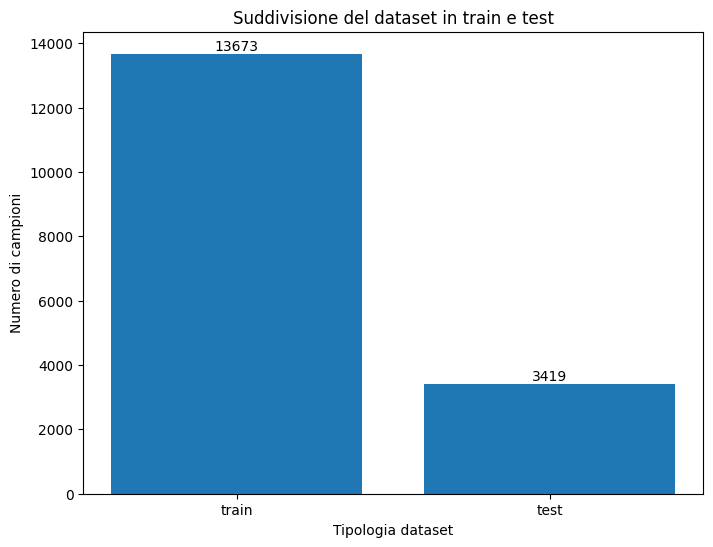

In [9]:
from sklearn.model_selection import train_test_split
X_feature = df["image"]
y_feature=df["label"]


X_train_pd, X_test_pd, y_train_pd, y_test_pd = train_test_split(X_feature, y_feature, test_size=0.2, random_state=42,shuffle=True,stratify=y_feature)

plt.figure(figsize=(8, 6))
bar=plt.bar(["train", "test"], [X_train_pd.size,X_test_pd.size])
plt.bar_label(bar)
plt.xlabel("Tipologia dataset")
plt.ylabel("Numero di campioni")
plt.title("Suddivisione del dataset in train e test")
plt.show()

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=100)

model.fit(X_train_pd.to_list(), y_train_pd)

y_pred = model.predict(X_test_pd.to_list())

accuracy = accuracy_score(y_test_pd, y_pred)
print(f'Accuracy: {accuracy:.2f}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.76
